# Trabalho 2 - Conway’s Game of Life

Paulo Jorge Fernandes Freitas - A100053 & Pedro Manuel Pereira dos Santos - A100110

2. O Conway’s Game of Life é um exemplo conhecido de um autómato celular . Aqui vamos modificar as regras do autómato de forma a usar um espaço de estados finito
    1. O espaço de estados é finito definido por uma grelha de células booleanas (morta=0/viva=1) de dimensão $\,N\times N\,$ (com $N>3$) identificadas por índices $\,(i,j)\in \{1..N\}$.  Estas $\;N^2\;$ células são aqui referidas como “normais”. 
    2. No estado inicial todas as células normais estão mortas excepto  um quadrado $\,3\times 3\,$, designado por “centro”, aleatoriamente posicionado formado apenas por células vivas.
    3. Adicionalmente existem $\,2\,N+1\,$ “células da borda” que correspondem a um dos índices, $i$ ou $j$, ser zero. As células da borda têm valores constantes que, no estado inicial, são gerados aleatoriamente com uma probabilidade $\,\rho\,$ de estarem vivas.
    4. As células normais o autómato modificam o estado de acordo com a regra “B3/S23”: i.e. a célula nasce (passa de $0$ a $1$) se tem exatamente 3 vizinhos vivos e sobrevive (mantém-se viva) se o número de vizinhos vivos é 2 ou 3, caso contrário morre ou continua morta. 
    
**Nota:** A célula $\;(i_0,j_0)\;$ e $\,(i_1,j_1)\,$ são vizinhas sse $\;(i_0-i_1=\pm 1) \,\lor\, (j_0-j_1 = \pm 1)$

## Análise do problema

Após a construção do Conway’s Game of Life, é necessario:

A. Construir uma máquina de estados finita que represente este autómato;  
B. Verificar se se conseguem provar as seguintes propriedades:
1. Todos os estados acessíveis contém pelo menos uma célula.
2. Toda a célula normal está viva pelo menos uma vez em algum estado acessível.

**Variáeveis:**

grid_N -> duplo com as linhas e colunas da matriz  
gris -> matriz  
x -> x do centro do quadrado 3x3  
y -> y do centro do quadrado 3x3  
updated_grid -> matriz atualizasa  
days -> dias que o Game of life occorre  
alive -> numero de células vivas vizinhas e a propia numa certa posição  

## Implementação

Começamos por importar as bibliotecas:
1. numpy para a matriz
2. random para gerar aleatoriedades
3. matplotlib.pyplot para dar print da matriz

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Criação da matriz com tudo a zero

In [2]:
grid_N = (100,100)

grid = np.zeros([grid_N[0],grid_N[1]])

## Condições

Condiçao da alinea b), geração um quadrado 3x3 aleatoriamente (tirando centros como (0,0)).

In [3]:
x = random.randint(2,grid_N[0]-2)
y = random.randint(2,grid_N[1]-2)

for i in range(-1, 2):
    for j in range(-1, 2):
        grid[x + i][y + j] = 1

Condiçao da alinea c), geração aleatoria de celulas vivas nas laterais

In [4]:
for i in random.sample(range(0,grid_N[0]),random.randint(1,grid_N[0]-1)):
    grid[i][0]=1

for j in random.sample(range(0,grid_N[1]),random.randint(1,grid_N[1]-1)):
    grid[0][j]=1

## Programa do Conway’s Game of Life

Faz days iterações com as regras do Conway’s Game of Life

In [5]:
days = 100

for d in range(days):    
    updated_grid = np.zeros([grid.shape[0], grid.shape[1]])
    
    for row, col in np.ndindex(grid.shape):
        #contar quantos vivos
        alive = np.sum(grid[row-1:row+2, col-1:col+2]) - grid[row, col]
        
        if grid[row, col] == 1:
            # se alive < 2 or alive > 3, nao e necessario fazer nada porque ja esta a zero
            # se tiver 2 ou 3 vizinhos, a celula é viva
            if 2 <= alive <= 3:
                updated_grid[row, col] = 1
        else:
            #se tiver 3 vizinhos, a celula é viva
            if alive == 3:
                updated_grid[row, col] = 1
    grid = updated_grid

## Impressão dos resultados

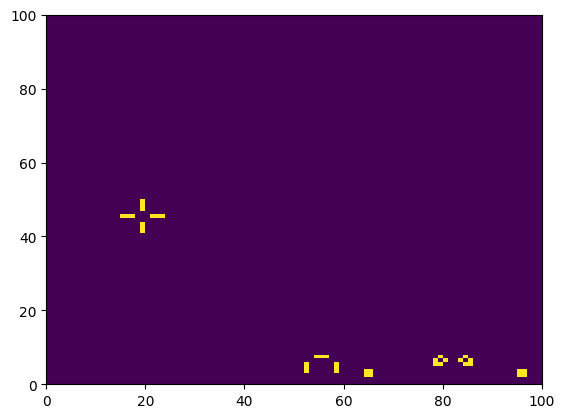

In [6]:
plt.pcolormesh(grid)
plt.axis('on')
plt.show()